ka/D 0.01
total number of voxels 46864
area fraction of all particle 0.00392699081699
acceptance prob 0.0014493132212
D 1.0 rm 0.005
rv 0.005
k 0.01
rv 0.0083
k 0.00989840146351
rv 0.025
k 0.00989219600654


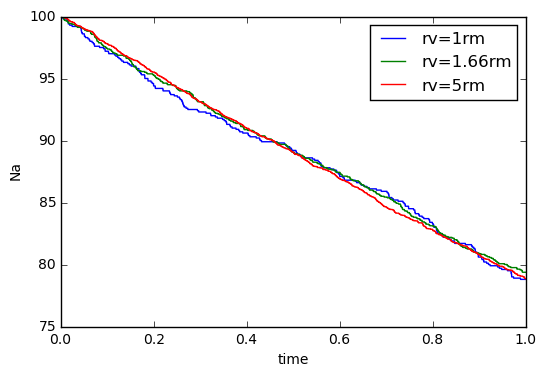

In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
pi = math.pi

simrun = 10
L = 2.
rm = 0.005
factors = [1,1.66,5]
D = 1.
Dt = 2*D
Rt = 2*rm
ka = 0.01
H = 3*rm*2
dur = 1.
taum = (2*rm)**2/4/D/2
ori = Real3(0.5*H,0,0)
unit0 = Real3(0,0,L)
unit1 = Real3(0,L,0)
w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),rm)
cs = w.row_size()
ls = w.layer_size()
Nmv = cs*ls
At = L*L
Nt = 100
Av = math.pi*rm*rm
phi = 2.*Nt*Av/At
Pacc = ka*(2*math.sqrt(2)+4*math.sqrt(3)+3*math.sqrt(6)+math.sqrt(22))**2 / 72/(2*D)/(6*math.sqrt(2)+4*math.sqrt(3)+3*math.sqrt(6))
print 'ka/D',str(ka/D)
print 'total number of voxels',Nmv
print 'area fraction of all particle', phi
print 'acceptance prob',Pacc
print 'D',D,'rm',rm


def runsim(rv,kk):
    w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),rv)
    #x,y,z = w.actual_lengths()
    with species_attributes():
        A | {'D':str(D),'radius':str(rm),'location':'M'}
        B | {'D':str(D),'radius':str(rm),'location':'M'}
    with reaction_rules():
        A + B > B | kk
    m=get_model()
    w.bind_to(m)
    w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
    w.add_molecules(Species('A'),Nt)
    w.add_molecules(Species('B'),Nt)
    sim = spatiocyte.SpatiocyteSimulator(w)
    obs = FixedIntervalNumberObserver(taum, ('A', 'B'))
    sim.run(dur,obs)
    data=obs.data()
    dat = np.array(data)
    return dat

def phix(x):
    return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

def kt(t):
    p1 = 0.0791183
    p2 = 0.935916
    p3 = 2.62231
    p4 = 12.9791
    p5 = 8.70808
    E = math.sqrt(p4*Dt*ka*t/Rt/Rt/(ka+p5*Dt))
    denom = Dt + p1*ka*math.log(p2+(p3*Dt*t/Rt/Rt)+E)
    return ka*Dt/denom

for factor in factors:
    rv = factor*rm
    print 'rv',str(rv)
    Na = np.zeros(int(dur/taum)+1)
    if (factor!=1):
        tauv = (2*rv)**2/4/D/2
        dtau = tauv-taum
        dt = dtau/100#fine resolution needed for produce accurate numerical integration
        kts = [kt(t-taum) for t in np.arange(taum,tauv,dt)]
        ktm = np.trapz(kts,dx=dt)/dtau
        kk = ktm
    else:
        kk=ka
    print 'k',kk
    for rr in range(int(simrun*factor)):
        dat = runsim(rv,kk) 
        Na += dat[:,1]
    t = dat[:,0]   
    Na = Na/int(simrun*factor)
    plt.plot(t,Na,label='rv='+str(factor)+'rm')
plt.xlabel('time')
plt.ylabel('Na')
plt.legend(loc='best')



tm 0.01
walk time rm 0.0025
walk time rv 0.01
ka -9
dtau 0.0075
ka_ 0.10281024678


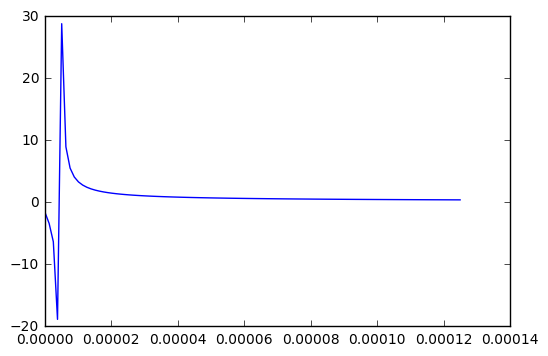

In [7]:
import math
D=0.005
rm=0.005
rv = 2*rm
ka=10^-3
Dt = 2*D
Rt = 2*rm
tm = (Rt)**2/Dt
pi=math.pi
twrm = (2*rm)**2/4/Dt
twrv = (2*rv)**2/4/Dt
dtau = twrv-twrm
print 'tm',tm
print 'walk time rm',twrm
print 'walk time rv',twrv

def phix(x):
    return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

def kt(t):
    p1 = 0.0791183
    p2 = 0.935916
    p3 = 2.62231
    p4 = 12.9791
    p5 = 8.70808
    E = math.sqrt(p4*Dt*ka*t/Rt/Rt/(ka+p5*Dt))
    denom = Dt + p1*ka*math.log(p2+(p3*Dt*t/Rt/Rt)+E)
    return ka*Dt/denom

dt = dtau/100#fine resolution needed for produce accurate numerical integration
kts = [kt(t-twrm) for t in np.arange(twrm,twrv,dt)]
ktm = np.trapz(kts,dx=dt)/dtau

print 'ka',ka
print 'dtau',dtau
print 'ka_',ktm

tt = np.linspace(0.0,1*taum,100)
ktt = [kt(i) for i in tt]
plt.plot(tt,ktt)


In [17]:
g = 0.577216 #euler constant
D = 1.
ratio = 1.#ka/D
ka = D*ratio
R = 0.005
pi = math.pi
tm = (R)**2/4./D
def intk(t):
    X = D*t/R/R
    Y = math.log(4*X)-(2*g)+(4*pi*D/ka)
    Z = 1./Y
    P1 = X*(Z+Z**2+2*(Z**3)) 
    P2 = -g*X*(Z**2 + 2*(Z**3))
    P3 = - 1.331*0.5*X*2*(Z**3)
    print 'P1,P2,P3',P1,P2,P3
    P = P1 + P2 + P3
    print 'P',P
    print 'D',D
    out = 4*pi*R*R*P
    print 'keff',out
    return out

print 'tm',tm
intk(tm)
print 'ka',ka

tm 6.25e-06
P1,P2,P3 0.0241629563586 -0.00130224184348 -0.000223892622565
P 0.0226368218925
D 1.0
keff 7.11156733582e-06
ka 1.0


/home/chew/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:321: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/usr/lib/python2.7/dist-packages/scipy/integrate/quadpack.py:321: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which 

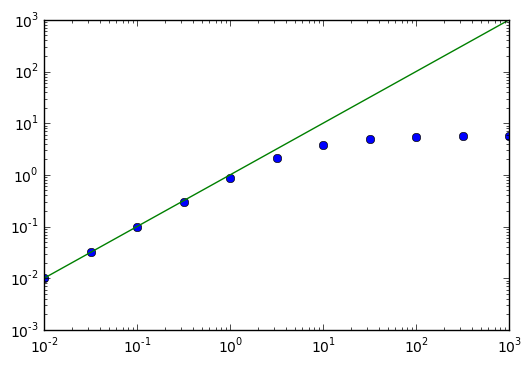